In [1]:
import numpy as np
import torch
from tqdm import tqdm

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn
import sys
seaborn.set()

import warnings
warnings.filterwarnings("ignore")

import reservoir
import computekernel
from reckernel import RecKernel
from kuramoto import KS
%load_ext autoreload
%autoreload 2

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [2]:
L    = 6
N    = 100
dt   = 0.25
ninittransients = 1000
tend = 5000 + ninittransients*dt  #50000
dns  = KS(L=L, N=N, dt=dt, tend=tend)

N_data_train = 10000
N_data_test = 10000

dns.simulate()
u = dns.uu[ninittransients:] / np.sqrt(N)
[u_train, u_test, _] = np.split(u, [N_data_train, N_data_train+N_data_test], axis=0)

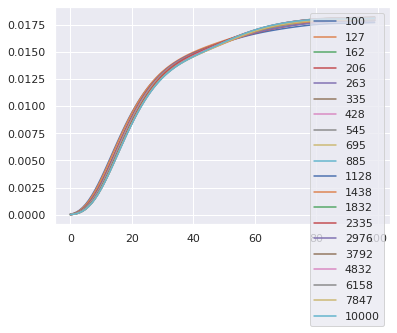

In [7]:
mserc = np.load('out/200521_ksmse_rc_pred100_nres10p2to10p4_in01res07.npy')

n_curves = 20
n_res_range = np.logspace(2, 4, num=n_curves, dtype=int)

sampl = 1
plt.plot(mserc[::sampl, :].T)
plt.legend(n_res_range[::sampl]);

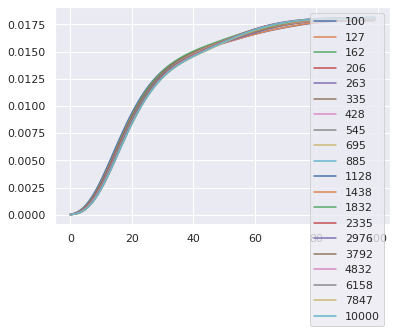

In [8]:
msesrc = np.load('out/200521_ksmse_src_pred100_nres10p2to10p4_in01res07.npy')

n_curves = 20
n_res_range = np.logspace(2, 4, num=n_curves, dtype=int)

sampl = 1
plt.plot(msesrc[::sampl, :].T)
plt.legend(n_res_range[::sampl]);

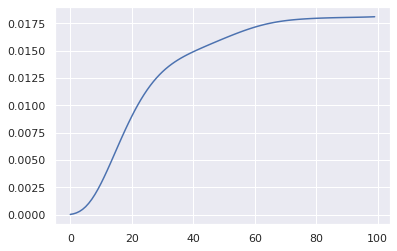

In [25]:
mserk = np.load('out/200522_ksmse_rk_pred100_in01res07.npy')

plt.plot(mserk)
# plt.legend(n_res_range[::sampl]);

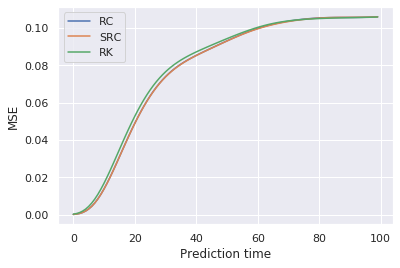

In [28]:
plt.plot(mserc[-1, :] / 0.171)
plt.plot(msesrc[-1, :] / 0.171)
plt.plot(mserk / 0.171)
plt.xlabel('Prediction time')
plt.ylabel('MSE')
plt.legend(['RC', 'SRC', 'RK'])

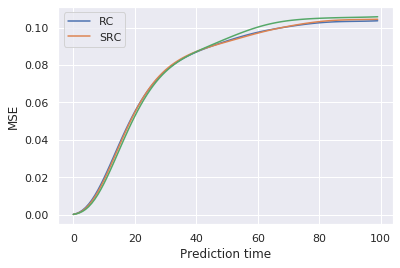

In [27]:
plt.plot(mserc[0, :] / 0.171)
plt.plot(msesrc[0, :] / 0.171)
plt.plot(mserk / 0.171)
plt.xlabel('Prediction time')
plt.ylabel('MSE')
plt.legend(['RC', 'SRC'])